<a href="https://colab.research.google.com/github/kalpana7093/testforestfires/blob/main/Apple_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
apple_df = pd.read_csv('/content/AAPL.csv')

In [ ]:
apple_df.shape

(10468, 7)

In [ ]:
apple_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


Data Preprocessing

In [ ]:
#checking for null values
apple_df.isna().sum()


,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


In [ ]:
#converting the dataype of 'Date' col to 'datetime'
apple_df['Date'] = pd.to_datetime(apple_df['Date'])


In [ ]:
#making the 'Date' col as index
apple_df.set_index('Date', inplace = True)

In [ ]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10468 entries, 1980-12-12 to 2022-06-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10468 non-null  float64
 1   High       10468 non-null  float64
 2   Low        10468 non-null  float64
 3   Close      10468 non-null  float64
 4   Adj Close  10468 non-null  float64
 5   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 572.5 KB


In [ ]:
#sort the indexes
apple_df.sort_index(inplace = True)

In [ ]:
apple_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [ ]:
# Apply log transformation to Volume to stabilize variance
apple_df['Log_Volume'] = np.log(apple_df['Volume'])


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
#deleting the original column of volume
apple_df.drop(columns = ['Volume'], inplace = True)


In [ ]:
apple_df.head()


,Open,High,Low,Close,Adj Close,Log_Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,19.966185
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,18.985340
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,18.476380
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,18.274980
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,18.112110


In [ ]:
#normalizing the data
scaler = MinMaxScaler()

# Identify and handle infinite values in 'Log_Volume' column
# Replace -inf with a very small number, for example, the minimum non-infinite value
min_log_volume = apple_df[~np.isinf(apple_df['Log_Volume'])]['Log_Volume'].min()
apple_df['Log_Volume'] = np.where(np.isinf(apple_df['Log_Volume']), min_log_volume, apple_df['Log_Volume'])

scaled_values = scaler.fit_transform(apple_df[apple_df.columns])

In [ ]:
scaled_values

array([[4.30950014e-04, 4.33270567e-04, 4.42511906e-04, 4.35483696e-04,
        3.40815838e-04, 6.78288373e-01],
       [3.97331936e-04, 3.96658463e-04, 4.05118893e-04, 3.98684579e-04,
        3.12018225e-04, 5.64020236e-01],
       [3.48427437e-04, 3.47836857e-04, 3.55255959e-04, 3.49613594e-04,
        2.73615897e-04, 5.04726625e-01],
       ...,
       [7.35239774e-01, 7.50670228e-01, 7.37757535e-01, 7.44010911e-01,
        7.46069029e-01, 4.87930845e-01],
       [7.23135563e-01, 7.23604845e-01, 7.20334206e-01, 7.14499102e-01,
        7.16477939e-01, 5.07337154e-01],
       [7.12126738e-01, 7.27377614e-01, 7.24634207e-01, 7.22742631e-01,
        7.24743614e-01, 5.32436535e-01]])

In [ ]:
#converting the array into dataframe
apple_scaled_df = pd.DataFrame(scaled_values, columns = apple_df.columns, index = apple_df.index)

In [ ]:
apple_scaled_df.head()

,Open,High,Low,Close,Adj Close,Log_Volume
Date,,,,,,
1980-12-12,0.000431,0.000433,0.000443,0.000435,0.000341,0.678288
1980-12-15,0.000397,0.000397,0.000405,0.000399,0.000312,0.564020
1980-12-16,0.000348,0.000348,0.000355,0.000350,0.000274,0.504727
1980-12-17,0.000361,0.000363,0.000371,0.000365,0.000286,0.481264
1980-12-18,0.000379,0.000381,0.000390,0.000383,0.000300,0.462289


Plotting Coluns

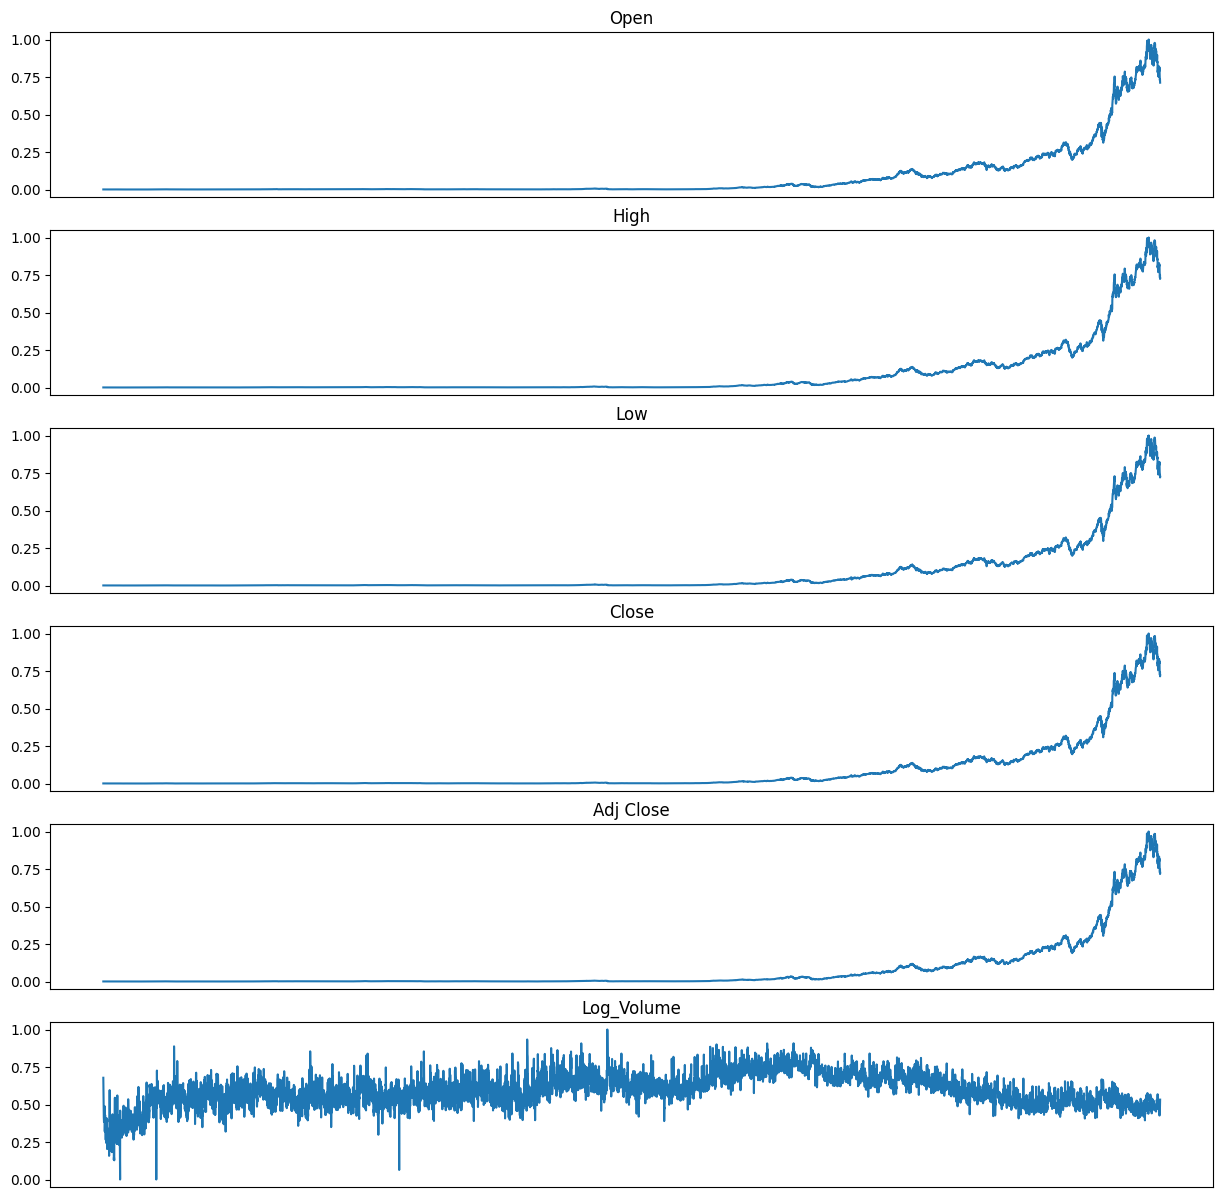

In [ ]:
plt.rcParams['figure.figsize'] = (15, 15)
figure, axes = plt.subplots(6)

for ax, col in zip(axes, apple_scaled_df.columns):
  ax.plot(apple_scaled_df[col])
  ax.set_title(col)
  ax.axes.xaxis.set_visible(False)

Create the Sliding window Sequence

In [ ]:
window_size = 60

def create_sequence(data, window_size):
    X = []
    y = []
    for i in range(window_size, len(data)):
        X.append(data.iloc[i-window_size:i].values)
        y.append(data.iloc[i].values)
    return np.array(X), np.array(y)

X, y = create_sequence(apple_scaled_df, window_size)


In [ ]:
X.shape, y.shape

((10408, 60, 6), (10408, 6))

In [ ]:
#train-test-split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8326, 60, 6), (8326, 6), (2082, 60, 6), (2082, 6))

In [ ]:
X_train.shape[1], X_train.shape[2], y_train.shape[1]

(60, 6, 6)

Building LSTM model

In [ ]:
model = keras.Sequential([
    # Adding the first LSTM layer with Dropout
    keras.layers.LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1], X_train.shape[2])),
    keras.layers.Dropout(0.3),

    # Adding the second LSTM layer with Dropout
    keras.layers.LSTM(units = 50, return_sequences=True),
    keras.layers.Dropout(0.3),

    # Adding the third LSTM layer with Dropout
    keras.layers.LSTM(units = 50, return_sequences=False),
    keras.layers.Dropout(0.3),

    # Adding a Dense output layer
    keras.layers.Dense(y_train.shape[1])
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#compilation
model.compile(optimizer = 'adam',
              loss = 'mean_squared_error',
              metrics = ['RootMeanSquaredError'])

In [ ]:
#Early stopping condition
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True)


In [ ]:
history = model.fit(X_train, y_train,
                    validation_split = 0.2,
                    epochs=100,
                    batch_size=3,
                    callbacks=[early_stopping])

Epoch 1/100
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 122s 55ms/step - RootMeanSquaredError: 0.0395 - loss: 0.0016 - val_RootMeanSquaredError: 0.0247 - val_loss: 6.0782e-04
Epoch 2/100
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 145s 56ms/step - RootMeanSquaredError: 0.0387 - loss: 0.0015 - val_RootMeanSquaredError: 0.0319 - val_loss: 0.0010
Epoch 3/100
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 123s 55ms/step - RootMeanSquaredError: 0.0381 - loss: 0.0015 - val_RootMeanSquaredError: 0.0276 - val_loss: 7.6429e-04
Epoch 4/100
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 142s 55ms/step - RootMeanSquaredError: 0.0358 - loss: 0.0013 - val_RootMeanSquaredError: 0.0234 - val_loss: 5.4957e-04
Epoch 5/100
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 122s 55ms/step - RootMeanSquaredError: 0.0355 - loss: 0.0013 - val_RootMeanSquaredError: 0.0247 - val_loss: 6.1253e-04
Epoch 6/100
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 122s 55ms/step - RootMeanSquaredError: 0.0357 - loss: 0.0013 - val_RootMeanSquaredError: 0.0328 - val_loss: 0.0011
Epoch 7/100
2220/2220 ━━━━━━━━━━━━━━

In [ ]:
# Making predictions on the test data
predictions = model.predict(X_test)

66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step


In [ ]:
# Inverse scaling to get the original values
predictions = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

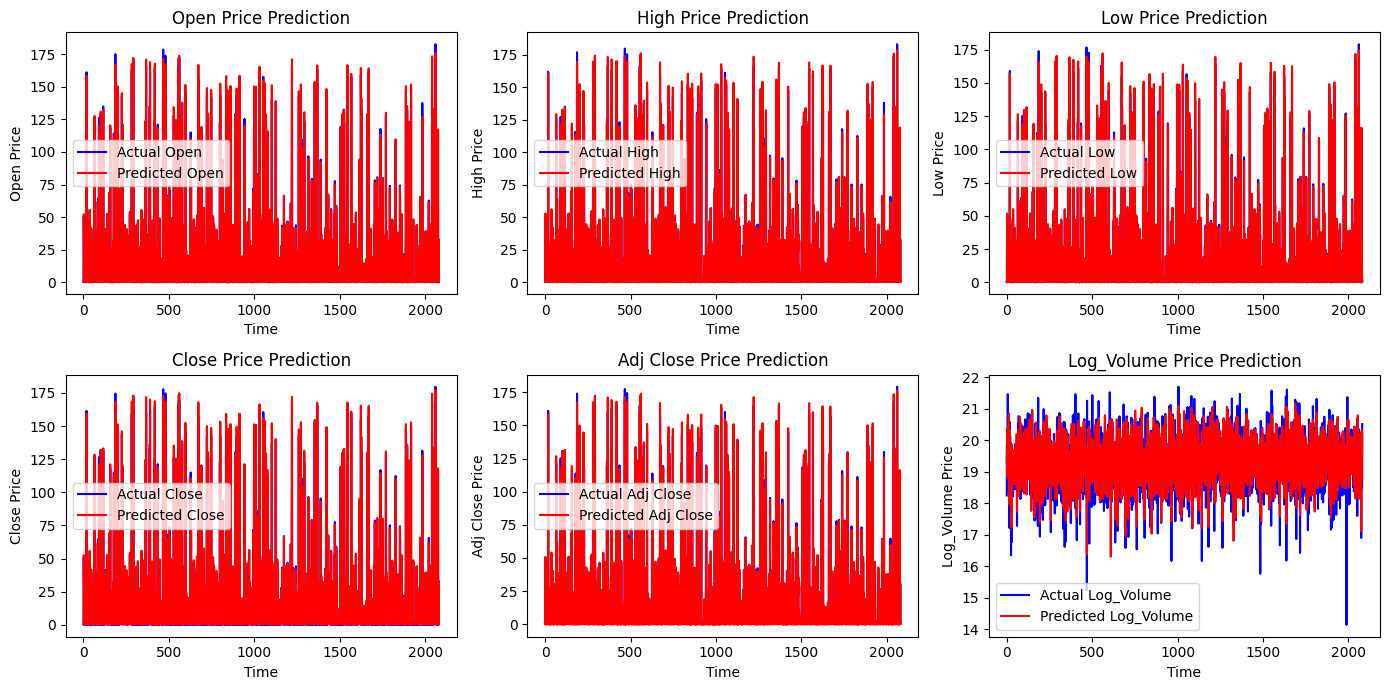

In [ ]:

# Plotting the results
plt.figure(figsize=(14, 7))

for i, col in enumerate(apple_scaled_df.columns):
    plt.subplot(2, 3, i + 1)
    plt.plot(y_test_rescaled[:, i], color='blue', label=f'Actual {col}')
    plt.plot(predictions[:, i], color='red', label=f'Predicted {col}')
    plt.title(f'{col} Price Prediction')
    plt.xlabel('Time')
    plt.ylabel(f'{col} Price')
    plt.legend()

plt.tight_layout()